In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
fontsize = 40

import os
import importlib
from time import time
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize, sparse
from codeStore import support_fun as spf
from src import slenderBodyTheory as slb

PWD = os.getcwd()
np.set_printoptions(linewidth=130, precision=5)

Populating the interactive namespace from numpy and matplotlib


## single helix version

In [2]:
importlib.reload(slb)

ph = 6.2832
rt1 = 1
rt2 = 0.08
ch_list = [1, 2, 4, 8, 12, 16, 24, 32, 40]
ch_list = [2, ]
gmres_maxiter = 300
intsij_limit=1000
intsij_epsabs=1e-10
intsij_epsrel=1e-6
ifprint = True
intsij_workers = 1 
hlx_node_fun=slb.x2_fun
FnMat_fun=slb.Fn2Mat_fun

At_list = []
Bt_list = []
Ct_list = []
ftr_list = []
frt_list = []
for chi in ch_list:
    print('-->ch=%5.2f' % (chi))
    tAt, tBt, tCt, tftr, tfrt = slb.Lightill_AtBtCt_1hlx(ph, rt1, rt2, chi, gmres_maxiter=gmres_maxiter, 
                                                         hlx_node_fun=hlx_node_fun, FnMat_fun=FnMat_fun, 
                                          intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
                                          intsij_workers=intsij_workers, ifprint=ifprint)
    At_list.append(tAt)
    Bt_list.append(tBt)
    Ct_list.append(tCt)
    ftr_list.append(tftr)
    frt_list.append(tfrt)
    print('ch=%5.2f, At=%f, Bt=%f, Ct=%f' % (chi, tAt, tBt, tCt))


-->ch= 2.00
--->> ch=2.000000, 2*natu_cut_th=0.093266, dth=0.093779, rel_err=1.100587e-02
nth = 134
create M matrix use 1.536710s
solve matrix equation use 0.009127s
solve matrix equation use 0.008277s
At=28.632135, Bt=6.930276, Ct=52.010507, rel_err of Bt is 7.060457e-04
ch= 2.00, At=28.632135, Bt=6.930276, Ct=52.010507


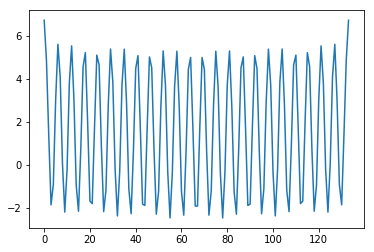

In [3]:
ftr = ftr_list[0]
plt.plot(ftr[2::3])

## double helix version

In [2]:
importlib.reload(slb)

ph = 10
rt1 = 1
rt2 = 0.01
ch_list = [1, 2, 4, 8, 12, 16, 24, 32, 40]
ch_list = [6, ]
intsij_nth_ch = 20
gmres_maxiter = 30
intsij_limit=1000
intsij_epsabs=1e-10
intsij_epsrel=1e-6
ifprint = True
# hlx_node_fun_list=(slb.x2_fun, slb.x1_fun, )
# FnMat_fun_list = (slb.Fn2Mat_fun, slb.Fn1Mat_fun,)
hlx_node_fun_list=(slb.x1_fun, )
FnMat_fun_list = (slb.Fn1Mat_fun, )

At_list = []
Bt_list = []
Ct_list = []
ftr_list = []
frt_list = []
for chi in ch_list:
    nthi = int(intsij_nth_ch * chi)
    print('-->ch=%5.2f, nth=%d' % (chi, nthi))
    tAt, tBt, tCt, tftr, tfrt = slb.Lightill_AtBtCt_nhlx(ph, rt1, rt2, chi, nth=nthi, gmres_maxiter=gmres_maxiter, 
                                                         hlx_node_fun_list=hlx_node_fun_list, FnMat_fun_list=FnMat_fun_list, 
                                                         intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
                                                         ifprint=ifprint)
    At_list.append(tAt)
    Bt_list.append(tBt)
    Ct_list.append(tCt)
    ftr_list.append(tftr)
    frt_list.append(tfrt)
    if not ifprint:
        print('ch=%5.2f, At=%f, Bt=%f, Ct=%f' % (chi, tAt, tBt, tCt))


-->ch= 6.00, nth=120
--->> ch=6.000000, 2*natu_cut_th=0.008771, dth=0.314159, rel_err=6.963187e+01
nth = 120 × 1 
create M matrix use 2.148029s
solve matrix equation use 0.001160s
solve matrix equation use 0.000880s
At=61.520128, Bt=18.715438, Ct=130.371686, rel_err of Bt is 2.769015e-03


In [5]:
importlib.reload(slb)
ph = 10
chi = 6
rt1 = 1
rt2 = 0.01
nthi = 20 * chi
gmres_maxiter = 30000
intsij_limit=1000
intsij_epsabs=1e-10
intsij_epsrel=1e-6
ifprint = True
use_tqdm_notebook=False
hlx_node_fun_list=(slb.x1_fun, )
FnMat_fun_list = (slb.Fn1Mat_fun, )
T_fun_list=(slb.T1_fun, )
# hlx_node_fun_list=(slb.x1_fun, slb.x2_fun, )
# FnMat_fun_list = (slb.Fn1Mat_fun, slb.Fn2Mat_fun, )
# T_fun_list=(slb.T1_fun, slb.T2_fun,)

# tAt, tBt, tCt, tftr, tfrt = slb.Lightill_AtBtCt_nhlx(ph, rt1, rt2, chi, nth=nthi, gmres_maxiter=gmres_maxiter, 
#                                                      hlx_node_fun_list=hlx_node_fun_list, FnMat_fun_list=FnMat_fun_list, 
#                                                      intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
#                                                      ifprint=ifprint)
# print()
data_lightill = slb.Lightill_AtBtCt_nhlx(ph, rt1, rt2, chi, nth=nthi, gmres_maxiter=gmres_maxiter, 
                                                     hlx_node_fun_list=hlx_node_fun_list, FnMat_fun_list=FnMat_fun_list, 
                                                     intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
                                                     ifprint=ifprint)
print()
# tAt, tBt, tCt, tftr, tfrt = slb.KRJ_AtBtCt_1hlx(ph, rt1, rt2, chi, nth=nthi, gmres_maxiter=gmres_maxiter, 
#                                                 hlx_node_fun=slb.x1_fun, T_fun=slb.T1_fun, 
#                                                 intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
#                                                 ifprint=ifprint)
# print()
data_KRJ = slb.KRJ_AtBtCt_nhlx(ph, rt1, rt2, chi, nth=nthi, gmres_maxiter=gmres_maxiter, 
                                                hlx_node_fun_list=hlx_node_fun_list, T_fun_list=T_fun_list, 
                                                intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
                                                ifprint=ifprint, use_tqdm_notebook=use_tqdm_notebook)

--->> ch=6.000000, 2*natu_cut_th=0.008771, dth=0.314159, rel_err=6.963187e+01
nth = 120 × 1 
create M matrix use 2.139748s
solve matrix equation use 0.001276s
solve matrix equation use 0.001129s
At=61.520128, Bt=18.715438, Ct=130.371686, rel_err of Bt is 2.769015e-03

--->> ch=6.000000, 2*natu_cut_th=0.008771, dth=0.314159, rel_err=6.963187e+01
nth = 120 × 1 
create M matrix use 0.638452s
solve matrix equation use 0.001182s
solve matrix equation use 0.001019s
At=64.315924, Bt=19.364969, Ct=141.615599, rel_err of Bt is 3.072844e-03


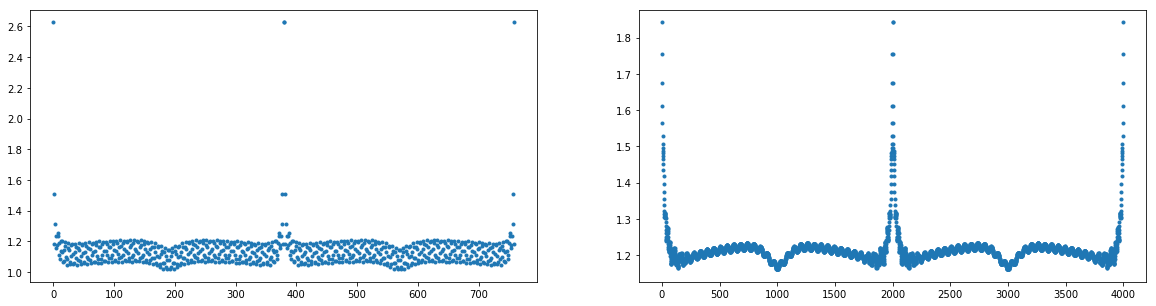

In [288]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.patch.set_facecolor('white')
tAt, tBt, tCt, tftr, tfrt = data_lightill
axi = axs[0]
axi.plot(tftr[2::3], '.')
tAt, tBt, tCt, tftr, tfrt = data_KRJ
axi = axs[1]
axi.plot(tftr[2::3], '.')

## PETSC version slender body theory. 

In [11]:
import os
import importlib
from time import time
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize, sparse

from ecoli_in_pipe import do_slenderbodytheory as do_SLB
importlib.reload(do_SLB)

ph = 10
rt1 = 1
rt2 = 0.1
ch = 6
n_segment = ch * 10

At, Bt, Ct, ftr_info, frt_info = do_SLB.do_KRJ_1helix(ph, rt1, rt2, ch, n_segment)
print(At, Bt, Ct)

85.69540016497602 22.332669900174686 254.84832321593942


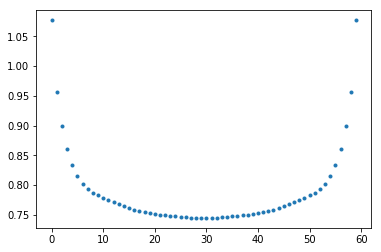

In [12]:
# hlx_obj.show_force(length_factor=0.002)
plt.plot(2-ftr_info[0][1][2::3], '.')

--->> ch=4.000000, 2*natu_cut_th=0.162823, dth=0.314159, rel_err=1.858909e+00
nth = 80
create M matrix use 0.854830s
solve matrix equation use 0.003836s
solve matrix equation use 0.003372s
At=25.966119, Bt=0.728003, Ct=52.817457, rel_err of Bt is -4.724263e-04


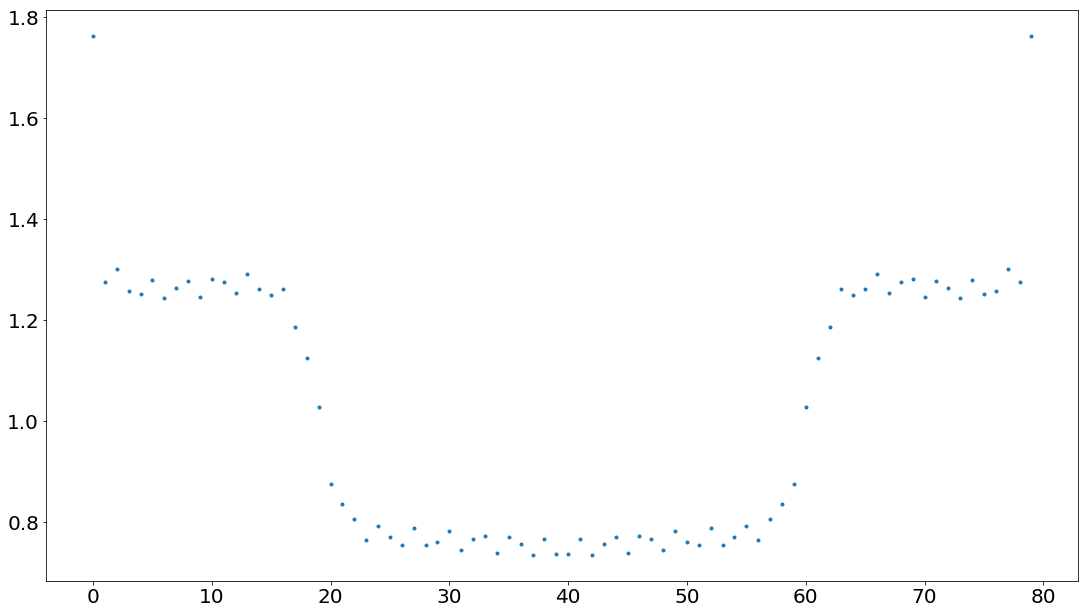

In [12]:
from src import slenderBodyTheory as slbt
importlib.reload(slbt)
gmres_maxiter = 30000
intsij_limit=1000
intsij_epsabs=1e-10
intsij_epsrel=1e-6
ifprint = True
use_tqdm_notebook=True
hlx_node_fun=slbt.x1_fun
FnMat_fun = slbt.Fn1Mat_fun
hlx_node_fun_list=(slbt.x1_fun, slbt.x2_fun, )
FnMat_fun_list = (slbt.Fn1Mat_fun, slbt.Fn2Mat_fun, )
T_fun_list=(slbt.T1_fun, slbt.T2_fun,)

tAt, tBt, tCt, tftr, tfrt = slbt.Lightill_AtBtCt_1hlx(ph, rt1, rt2, ch, nth=n_segment, gmres_maxiter=gmres_maxiter, 
                                                     hlx_node_fun=hlx_node_fun, FnMat_fun=FnMat_fun, 
                                                     intsij_epsabs=intsij_epsabs, intsij_epsrel=intsij_epsrel, intsij_limit=intsij_limit, 
                                                     intsij_workers=intsij_workers, ifprint=ifprint)
plt.plot(tftr[2::3], '.')

## Petsc version, compare Lightill and KRJ theory

In [1]:
%load_ext autoreload
%autoreload 2

import os
from time import time
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize, sparse
from ecoli_in_pipe import do_slenderbodytheory as do_SLB
from codeStore import support_fun as spf
from tqdm.notebook import tqdm as tqdm_notebook


In [ ]:
ph = 1
rt1 = 1
rt2_list = 10 ** np.linspace(-6, -1, 6)
ch_list = 10 ** np.linspace(0, 2, 10)
nseg_fct = 20
n_hlx = 2
slb_epsabs=1e-200
slb_epsrel=1e-10
slb_limit=10

data = []
for rt2 in rt2_list:
    data_rt2 = []
    for ch in tqdm_notebook(ch_list):
        n_segment = np.ceil(ch * nseg_fct).astype(int)
        data_KRJ = do_SLB.do_KRJ_nhelix(ph, rt1, rt2, ch, n_segment=n_segment, n_hlx=n_hlx, 
                                                              slb_epsabs=slb_epsabs, slb_epsrel=slb_epsrel, slb_limit=slb_limit)
        data_Lightill = do_SLB.do_Lightill_nhelix(ph, rt1, rt2, ch, n_segment=n_segment, n_hlx=n_hlx, 
                                                              slb_epsabs=slb_epsabs, slb_epsrel=slb_epsrel, slb_limit=slb_limit)
        data_rt2.append((ch, data_KRJ, data_Lightill))
    data.append((rt2, data_rt2))

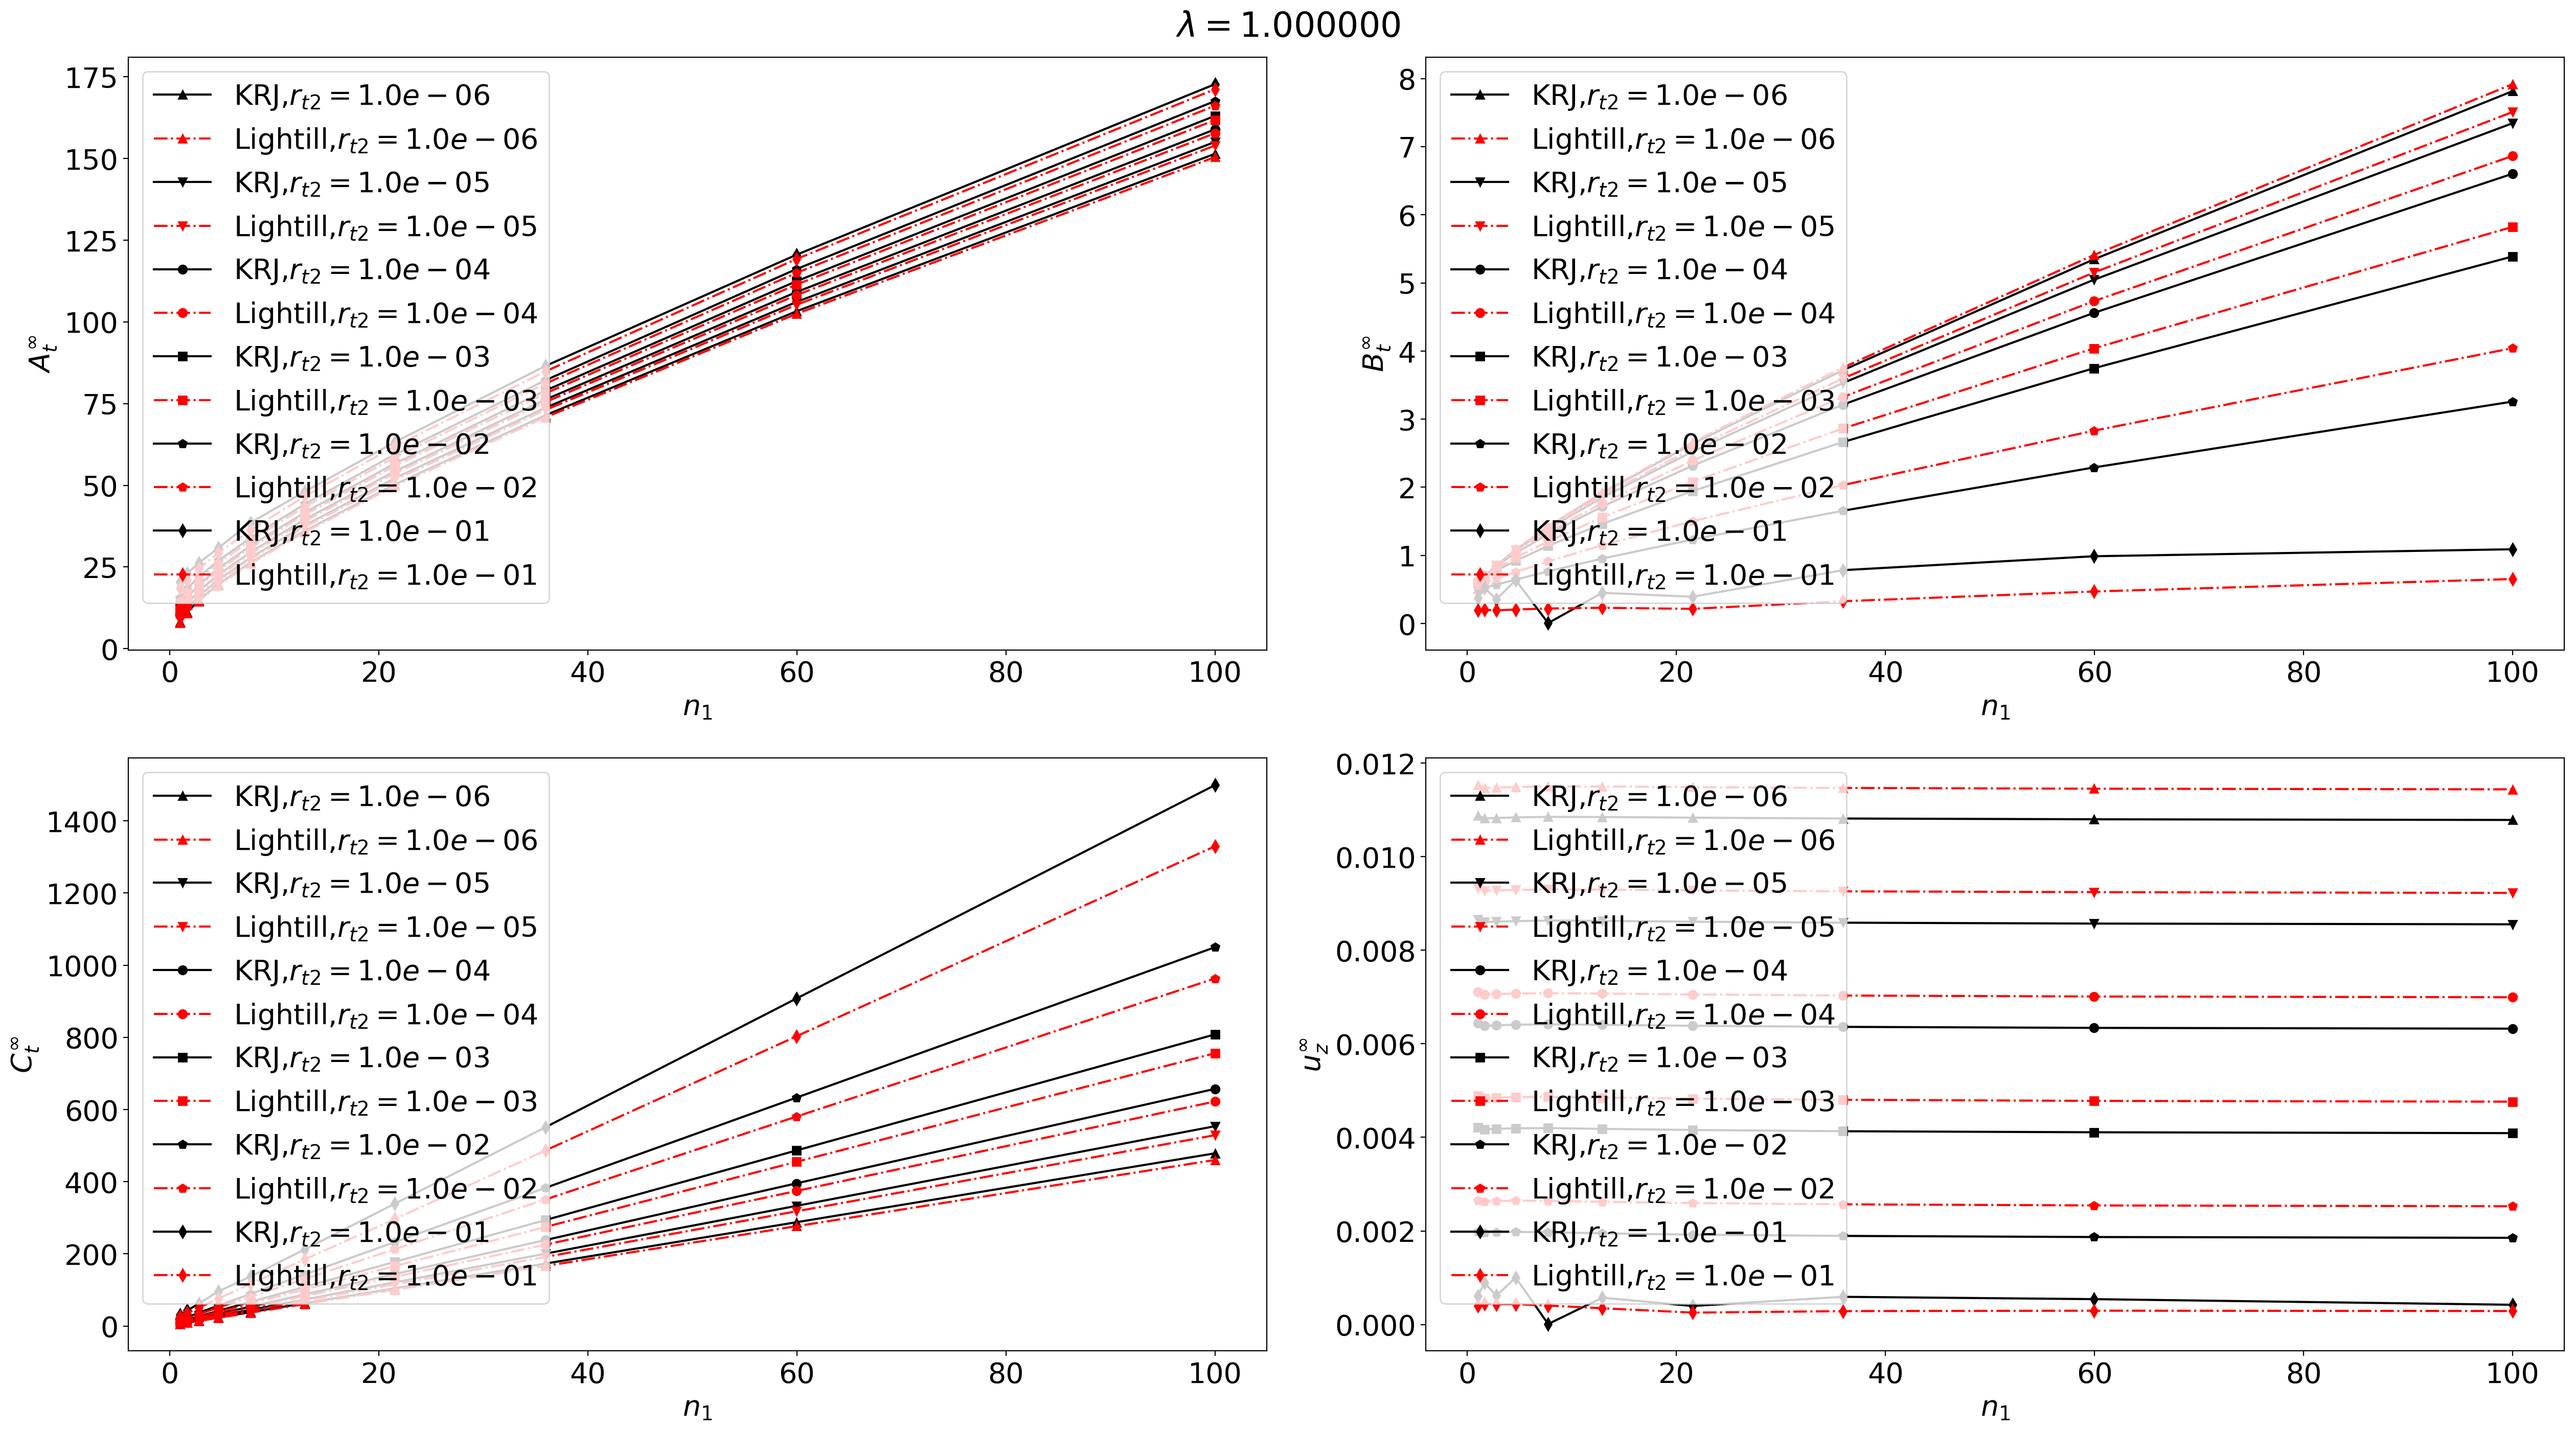

In [69]:
figsize = np.array((16, 9)) * 1.6
dpi = 200

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')

for (rt2, data_rt2), tcolor, tmk in zip(data, spf.color_list, spf.markerstyle_list):
    t_KRJ = []
    t_Lightill = []
    for ch, data_KRJ, data_Lightill in data_rt2:
        t_KRJ.append(data_KRJ[:3])
        t_Lightill.append(data_Lightill[:3])
    t_KRJ = np.vstack(t_KRJ)
    t_Lightill = np.vstack(t_Lightill)

    # At
    axi = axs[0][0]
    axi.plot(ch_list, t_KRJ[:, 0], '-k', marker=tmk, label='KRJ,$r_{t2}=%.1e$' % rt2)
    axi.plot(ch_list, t_Lightill[:, 0], '-.r', marker=tmk, label='Lightill,$r_{t2}=%.1e$' % rt2)
    axi.set_xlabel('$n_1$')
    axi.set_ylabel('$A_t^\\infty$')
    axi.legend(loc='upper left')
#     axi.set_xscale('log')

    # Bt
    axi = axs[0][1]
    axi.plot(ch_list, t_KRJ[:, 1], '-k', marker=tmk, label='KRJ,$r_{t2}=%.1e$' % rt2)
    axi.plot(ch_list, t_Lightill[:, 1], '-.r', marker=tmk, label='Lightill,$r_{t2}=%.1e$' % rt2)
    axi.set_xlabel('$n_1$')
    axi.set_ylabel('$B_t^\\infty$')
    axi.legend(loc='upper left')
#     axi.set_xscale('log')

    # Ct
    axi = axs[1][0]
    axi.plot(ch_list, t_KRJ[:, 2], '-k', marker=tmk, label='KRJ,$r_{t2}=%.1e$' % rt2)
    axi.plot(ch_list, t_Lightill[:, 2], '-.r', marker=tmk, label='Lightill,$r_{t2}=%.1e$' % rt2)
    axi.set_xlabel('$n_1$')
    axi.set_ylabel('$C_t^\\infty$')
    axi.legend(loc='upper left')
#     axi.set_xscale('log')

    # uz
    axi = axs[1][1]
    tu = t_KRJ[:, 1] / t_KRJ[:, 0] / t_KRJ[:, 2] * ch_list
    axi.plot(ch_list, tu, '-k', marker=tmk, label='KRJ,$r_{t2}=%.1e$' % rt2)
    tu = t_Lightill[:, 1] / t_Lightill[:, 0] / t_Lightill[:, 2] * ch_list
    axi.plot(ch_list, tu, '-.r', marker=tmk, label='Lightill,$r_{t2}=%.1e$' % rt2)
    axi.set_xlabel('$n_1$')
    axi.set_ylabel('$u_z^\\infty$')
    axi.legend(loc='upper left')
#     axi.set_xscale('log')

fig.suptitle('$\\lambda=%f$' % ph)
fig.tight_layout(rect=(0, 0, 1, 0.97))

## dbg Lsbt factor of KRJ theory

In [1]:
%load_ext autoreload
%autoreload 2

import os
from time import time
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize, sparse
from ecoli_in_pipe import do_slenderbodytheory as do_SLB
from codeStore import support_fun as spf
from tqdm.notebook import tqdm as tqdm_notebook
from codeStore.support_fun_head_tail import *


In [2]:
drop_zoom_factor = 2
rt1 = 1
rt2 = 0.1
tail_dir = '0.1'
myPWD = '/home/zhangji/Documents/Microorgnisms/ecoliInPipe'

data_rota = get_rota_data_head(myPWD=myPWD)
data_tran = get_tran_data_head(myPWD=myPWD)
index_all = data_tran.index.join(data_rota.index)
columns_all = data_tran.columns.join(data_rota.columns)
zoom_factor = columns_all.levels[1].values
data_rota = data_rota.reindex(index_all).reindex(columns_all, axis=1).drop(zoom_factor[zoom_factor>drop_zoom_factor], axis=1, level=1)
data_tran = data_tran.reindex(index_all).reindex(columns_all, axis=1).drop(zoom_factor[zoom_factor>drop_zoom_factor], axis=1, level=1)
lh_all = data_rota.index.values

matrix_time = merge_data(data_rota.matrix_time, data_tran.matrix_time)
radius = merge_data(data_rota.radius, data_tran.radius)
n_node = merge_data(data_rota.n_node, data_tran.n_node)
psi1 = data_rota.psi
psi0 = data_tran.psi
psi00 = psi0[0]
psi10 = psi1[0]
err_rota = data_rota.err
err_tran = data_tran.err

data_bck = get_data_tail(tail_dir, myPWD=myPWD)
t1_idx = (data_bck.index.levels[0], data_bck.index.levels[1])
t2_idx = pd.MultiIndex.from_product(t1_idx, names=data_bck.index.names)
data_bck = data_bck.reindex(t2_idx).dropna(how='all')

matrix_time = data_bck.matrix_time
n_node = data_bck.n_node
psi2 = data_bck.psi2
psi3 = data_bck.psi3
psi6 = data_bck.psi6
psi20 = psi2[0].unstack()
psi30 = psi3[0].unstack()
psi60 = psi6[0].unstack()
zoom_factor = psi2.columns.values
ph_all = psi2.index.levels[0]

# symmetric method
head_dir = 'sym_validate5'
data_head_sym = get_data_head_symz(head_dir, myPWD=myPWD)
psi0_sym = data_head_sym.psi0
psi1_sym = data_head_sym.psi1

In [3]:
ph = 6
rt1 = 1
rt2 = 0.1
# ch_list = 10 ** np.linspace(0, 1, 3)
ch_list = np.linspace(1, 20, 20)
dbg_Lsbt_list = np.linspace(0, 1, 11)
nseg_fct = 20
n_hlx = 2
slb_epsabs=1e-200
slb_epsrel=1e-10
slb_limit=10

data_KRJ = []
for dbg_Lsbt in dbg_Lsbt_list:
    t1 = []
    for ch in tqdm_notebook(ch_list):
        n_segment = np.ceil(ch * nseg_fct).astype(int)
        data_KRJi = do_SLB.do_KRJ_nhelix(ph, rt1, rt2, ch, n_segment=n_segment, n_hlx=n_hlx, dbg_Lsbt=dbg_Lsbt, 
                                        slb_epsabs=slb_epsabs, slb_epsrel=slb_epsrel, slb_limit=slb_limit)
        t1.append(data_KRJi)
    data_KRJ.append(t1)

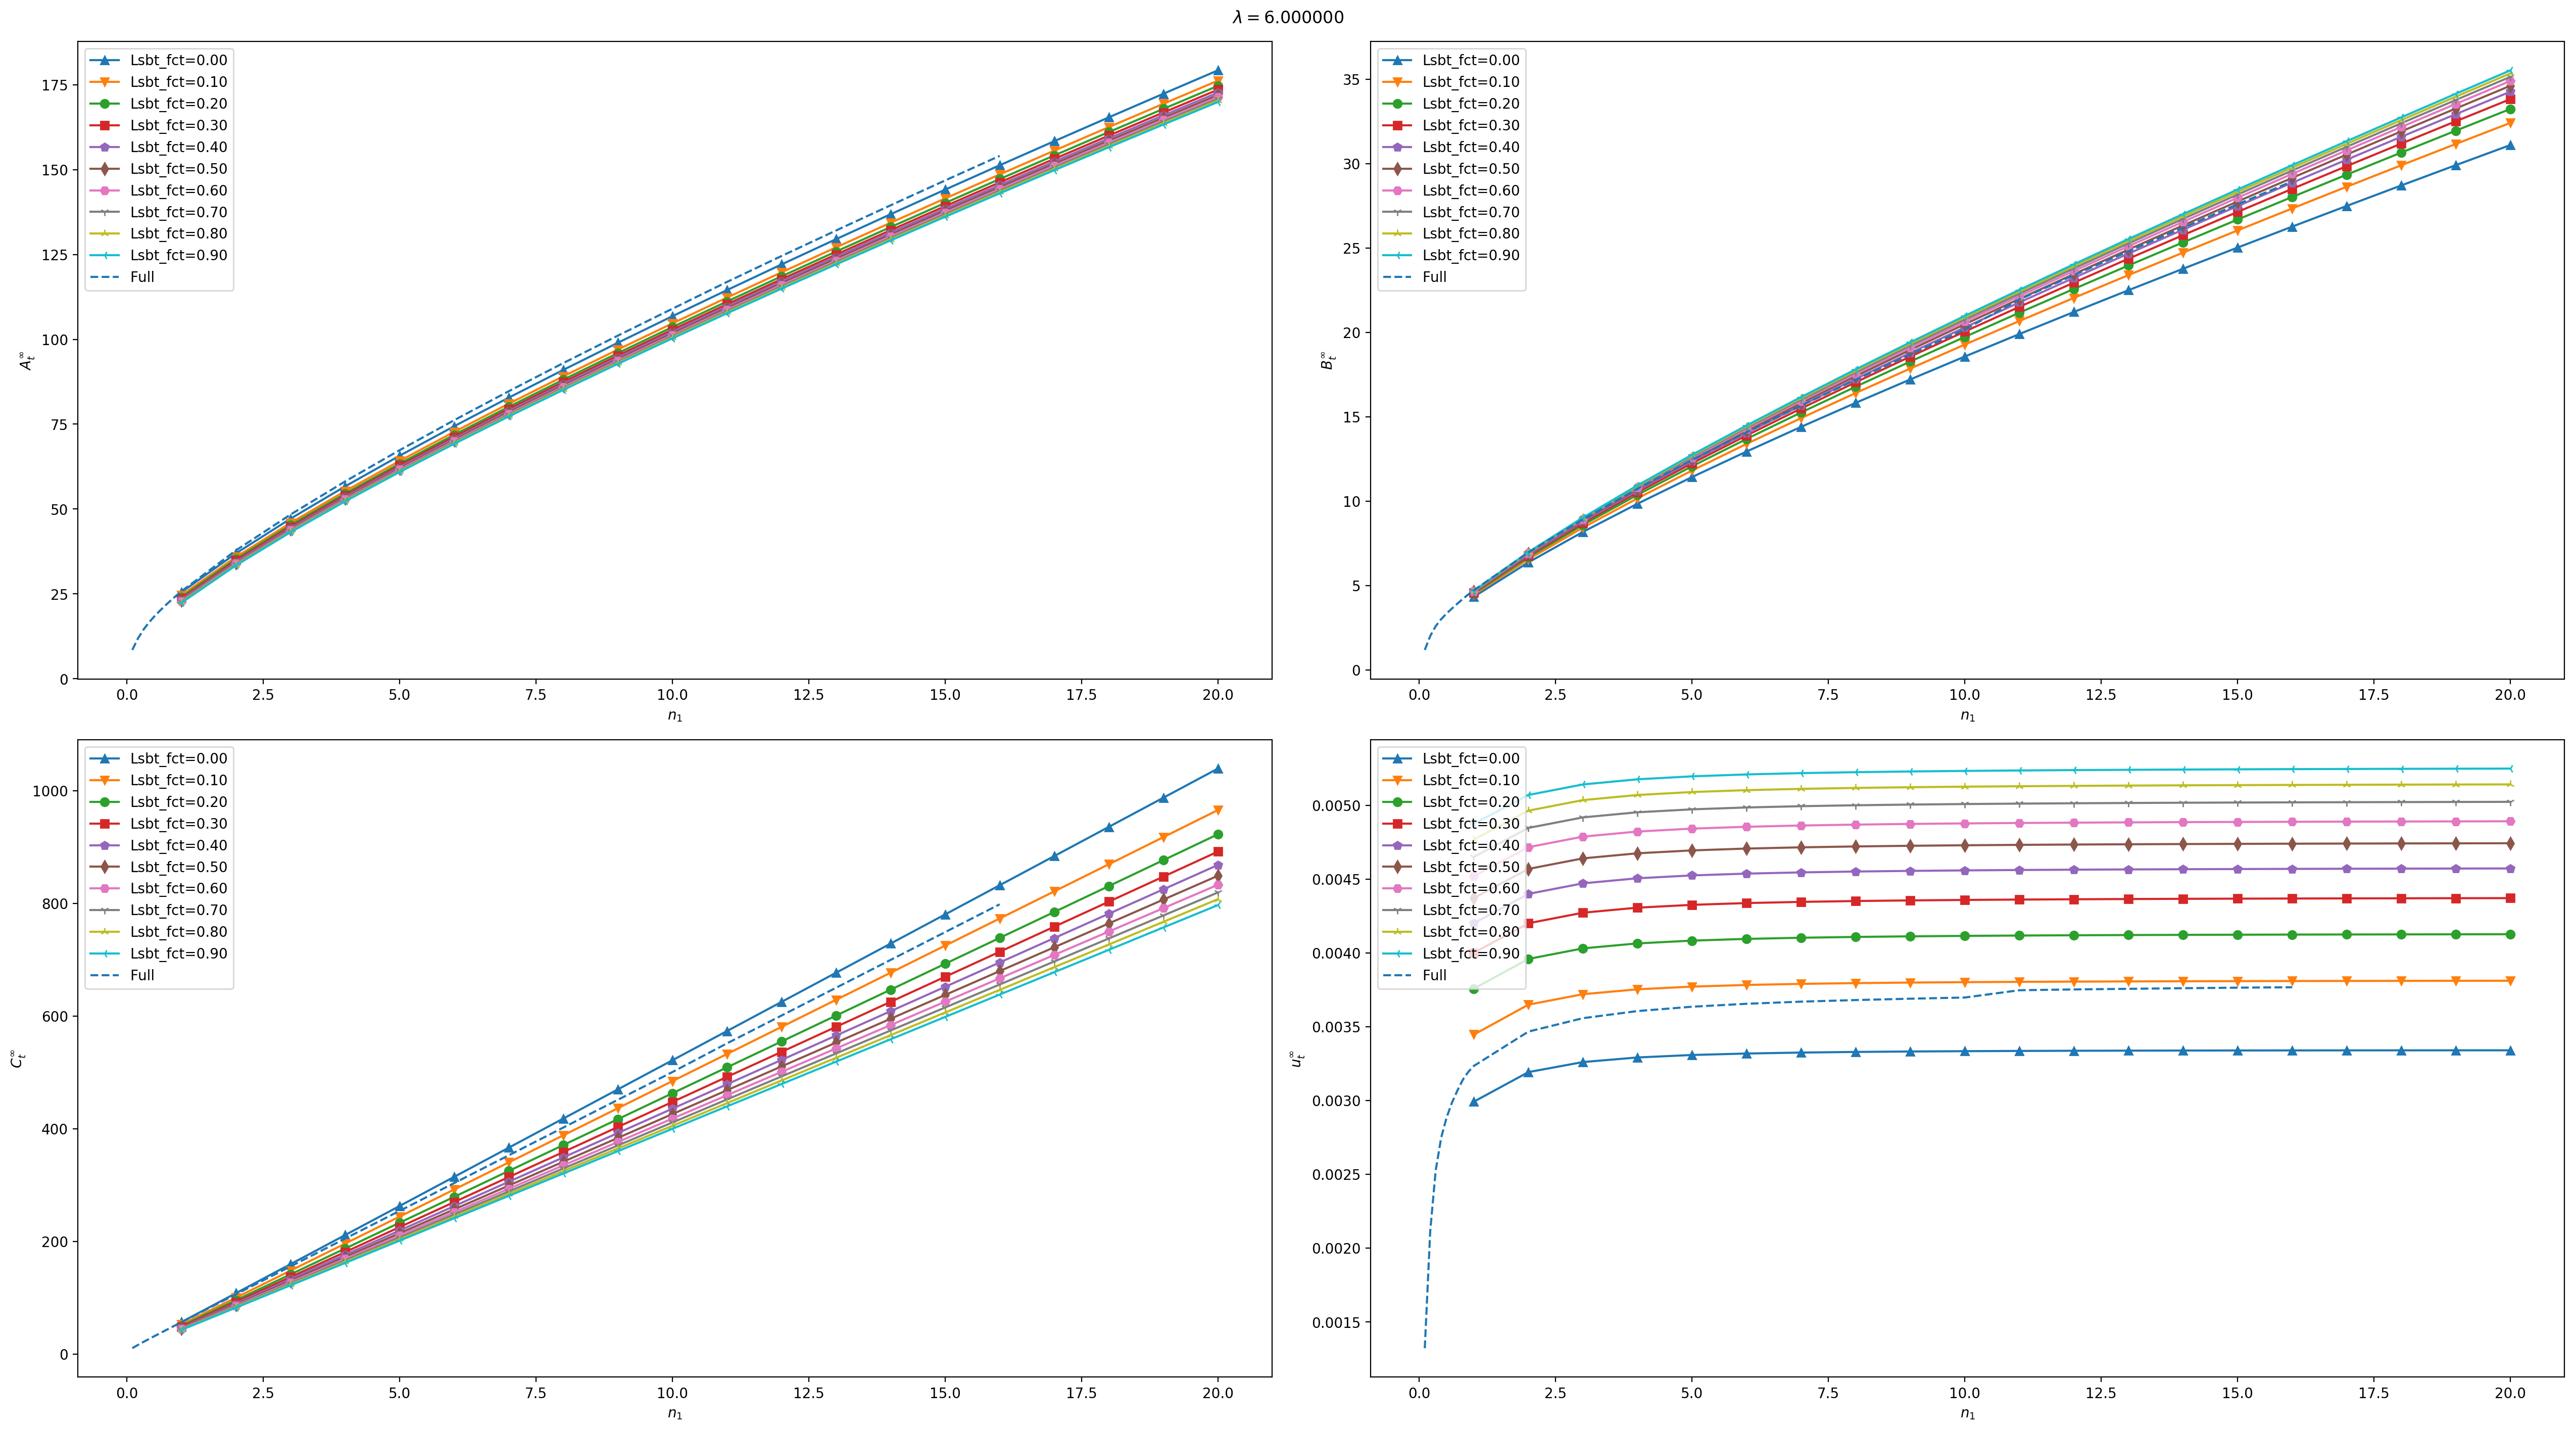

In [4]:
figsize = np.array((16, 9)) * 1.6
dpi = 200
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')
tmk = 'o'
# for (rt2, data_rt2), tcolor, tmk in zip(data, spf.color_list, spf.markerstyle_list):


for t0 in zip(data_KRJ, dbg_Lsbt_list, spf.color_list, spf.markerstyle_list):
    t1, tlabeli, tcolori, tmki = t0 
    t2 = np.vstack([data_KRJi[:3] for data_KRJi in t1])
    t2 = np.vstack((t2.T, (t2[:, 1] / t2[:, 0] / t2[:, 2] * ch_list).reshape((1, -1))))
    for t0 in zip(axs.flatten(), t2, ('$A_t^\\infty$', '$B_t^\\infty$', '$C_t^\\infty$', '$u_t^\\infty$')):
        axi, tyi, tylablei = t0
        axi.plot(ch_list, tyi, '-k', marker=tmki, color=tcolori, label='Lsbt_fct=%.2f' % tlabeli)
        axi.set_xlabel('$n_1$')
        axi.set_ylabel(tylablei)
tu = -psi60 / psi20 / psi30 * psi60.columns.values
for axi, tyi in zip(axs.flatten(), (psi20, -psi60, psi30, tu)):
    axi.plot(tyi.loc[ph].index.values, tyi.loc[ph].values, '--', label='Full')
    axi.legend(loc='upper left')

fig.suptitle('$\\lambda=%f$' % ph)
fig.tight_layout(rect=(0, 0, 1, 0.97))

## The limit $\lambda->\infty$ of helix is cylinder

In [29]:
rt1, rt2, chi = 1, 0.1, 10
epsabs = 1e-100
epsrel = 1e-10
ifprint = False
sij_fun = slb.sij_2hlx_fun
ph_list = 10 ** np.linspace(1, 10, 10)

for phi in ph_list:
    tAt, tBt, tCt, tftr, tfrt, tCij = slb.asymtotic_AtBtCtCij_lighthill(phi, rt1, rt2, chi, sij_fun=sij_fun, 
                                      epsabs=epsabs, epsrel=epsrel, ifprint=ifprint)
    print(tCij[1, 2] * phi)

0.6914445034840468
1.2260973541613005
1.2474791704585906
1.2478719859841723
1.2478777132160952
1.247877789073975
1.247877790012543
1.2478777900237268
1.24787779002386
1.2478777900238605
